In [1]:
from keras.datasets import mnist
#download mnist data and split into train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


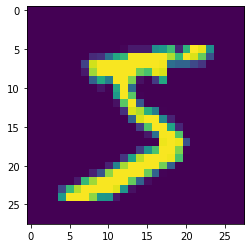

In [2]:
import matplotlib.pyplot as plt
#plot the first image in the dataset
plt.imshow(X_train[0])

In [3]:
#check image shape
X_train[0].shape

(28, 28)

In [4]:
#reshape data to fit model
X_train = X_train.reshape(60000,28,28,1)
X_test = X_test.reshape(10000,28,28,1)

In [5]:
from keras.utils import to_categorical
#one-hot encode target column
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [7]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten
#create model
model = Sequential()
#add model layers
model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(32, kernel_size=3, activation='relu'))
model.add(Flatten())
model.add(Dense(10, activation='softmax'))

In [8]:
#compile model using accuracy to measure model performance
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [9]:
#train the model
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2688 - accuracy: 0.9514 - val_loss: 0.0867 - val_accuracy: 0.9773
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0677 - accuracy: 0.9789 - val_loss: 0.0893 - val_accuracy: 0.9754
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0447 - accuracy: 0.9855 - val_loss: 0.0879 - val_accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0362 - accuracy: 0.9884 - val_loss: 0.0891 - val_accuracy: 0.9777
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0298 - accuracy: 0.9907 - val_loss: 0.1296 - val_accuracy: 0.9754


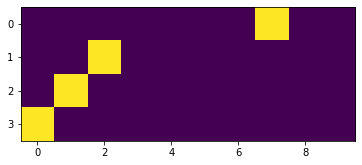

In [15]:
#predict first 4 images in the test set
plt.imshow(model.predict(X_test[:4]))

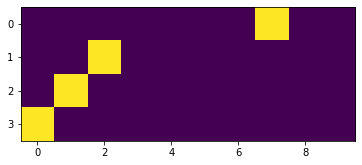

In [17]:
#actual results for first 4 images in test set
plt.imshow(y_test[:4])